# Mathematical Underpinnings - Lab 2

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from tqdm import tqdm

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [135]:
def population_risk(a, sigma_eps):
    return a**2 - 2*a + 1 + sigma_eps**2

### b)

In [136]:
# sampling
n = 50
sigma = 1

X = np.random.normal(0, 1, size=n)
eps = np.random.normal(0, sigma**2, size=n)
y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [137]:
def empirical_risk(a, X, y):
    return ((a*X - y)**2).mean()

### c)

#### population risk
$a^2 - 2a + 1 - \sigma^2$ where $\sigma = 1$

derivative is $2a - 2$, so argmin is 1 and min is 1

#### empirical risk below

In [138]:
# code, plot
print(population_risk(1, 1))
print(empirical_risk(1, X, y))


a_vals = np.linspace(0, 2, num=300)
pop_risks = population_risk(a_vals, 1)

emp_risks = [0] * len(a_vals)
for i in range(len(a_vals)):
    emp_risks[i] = empirical_risk(a_vals[i], X, y)

1
0.7574816860390439


In [139]:
res = minimize(empirical_risk, 0, args=(X, y))
print(res)
min_val_emp = res.fun
min_arg_emp = res.x

      fun: 0.755301117238286
 hess_inv: array([[0.55198967]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.95093572])


In [140]:
res = minimize(population_risk, 0, args=(1))
print(res)
min_val_pop = res.fun
min_arg_pop = res.x

      fun: 1.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999999])


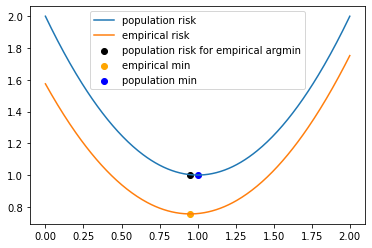

In [148]:
sns.lineplot(x=a_vals, y=pop_risks, label='population risk')
sns.lineplot(x=a_vals, y=emp_risks, label='empirical risk')
plt.scatter(x=min_arg_emp, y=population_risk(min_arg_emp, 1), color='black', label='population risk for empirical argmin')
plt.scatter(x=min_arg_emp, y=min_val_emp, color='orange', label='empirical min')
plt.scatter(x=min_arg_pop, y=min_val_pop, color='blue', label='population min')
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [142]:
# excess risk
print(population_risk(min_arg_emp, 1) - min_val_pop)

[0.0024073]


In [143]:
def get_excess_risk(n, sigma):
    X = np.random.normal(0, 1, size=n)
    eps = np.random.normal(0, sigma**2, size=n)
    y = X + eps
    
    res = minimize(empirical_risk, 0, args=(X, y))
    min_val_emp = res.fun
    min_arg_emp = res.x

    res = minimize(population_risk, 0, args=(sigma))
    min_val_pop = res.fun
    min_arg_pop = res.x
    
    return population_risk(min_arg_emp, sigma) - min_val_pop

In [144]:
# simulations with fixed sample size
L = 200
n = 50
sigma = 1

ex_risks = [0] * L
for i in range(L):
    ex_risks[i] = get_excess_risk(n, sigma)

In [145]:
np.mean(ex_risks)

0.019411218390436427

In [146]:
# simulations for various sample sizes
L = 200
n = 50
sigma = 1

ex_risks_all = []
n_list = range(50, 601, 50)
for n in n_list:
    ex_risks = [0] * L
    for i in range(L):
        ex_risks[i] = get_excess_risk(n, sigma)
    
    ex_risks_all.append(ex_risks)
ex_risks_all = np.array(ex_risks_all)

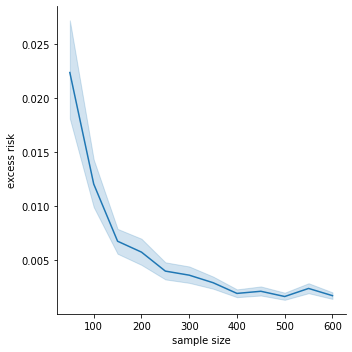

In [147]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
sns.relplot(x=np.array([[n] * L for n in n_list]).flatten(), y=ex_risks_all.flatten(), kind='line')
plt.xlabel('sample size')
plt.ylabel('excess risk')
plt.show()